In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mlp

bank=pd.read_csv(r'C:/Users\deepajay\Downloads/bank-full.csv')
print(bank)
print('----'*10)
print(bank.keys())
print('----'*10)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [5]:
print(bank.head().T)
print('----'*10)
print(bank.shape)
print('----'*10)
print(bank.columns)
print('----'*10)
print(bank.dtypes)
print('----'*10)

                    0           1             2            3        4
age                58          44            33           47       33
job        management  technician  entrepreneur  blue-collar  unknown
marital       married      single       married      married   single
education    tertiary   secondary     secondary      unknown  unknown
default            no          no            no           no       no
balance          2143          29             2         1506        1
housing           yes         yes           yes          yes       no
loan               no          no           yes           no       no
contact       unknown     unknown       unknown      unknown  unknown
day                 5           5             5            5        5
month             may         may           may          may      may
duration          261         151            76           92      198
campaign            1           1             1            1        1
pdays              -

In [6]:
for i in bank.columns:
    print(i)
    print(bank[i].unique())
    print('------'*10)

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
------------------------------------------------------------
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
------------------------------------------------------------
marital
['married' 'single' 'divorced']
------------------------------------------------------------
education
['tertiary' 'secondary' 'unknown' 'primary']
------------------------------------------------------------
default
['no' 'yes']
------------------------------------------------------------
balance
[ 2143    29     2 ...  8205 14204 16353]
------------------------------------------------------------
housing
['yes' 'no']
-----------------------------------------------------

In [7]:
numerical_cols = list(bank.select_dtypes(exclude=['object']))
print("object")
print(numerical_cols)
print('------'*10)
category_cols = list(bank.select_dtypes(include=['object']))
print("categrorical")
print(category_cols)
print('------'*10)

object
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
------------------------------------------------------------
categrorical
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
------------------------------------------------------------


C:\Users\deepajay\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\deepajay\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\deepajay\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

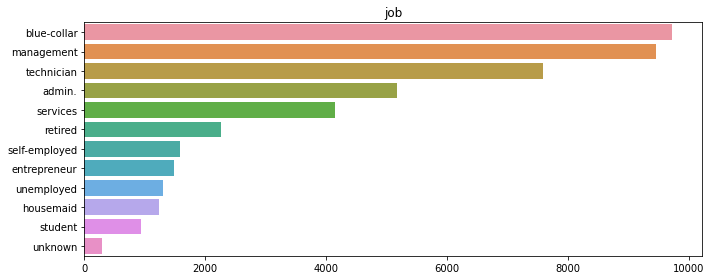

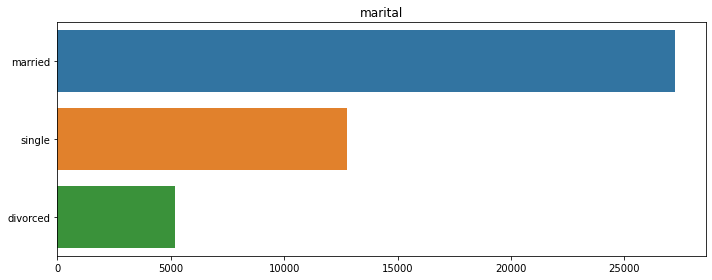

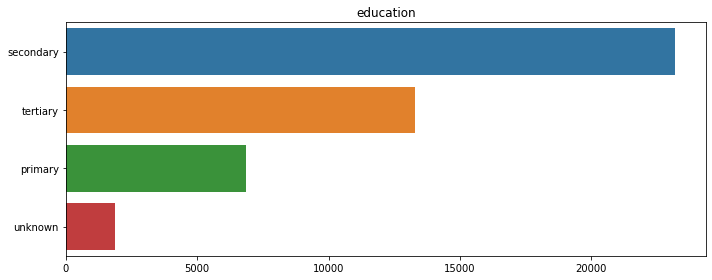

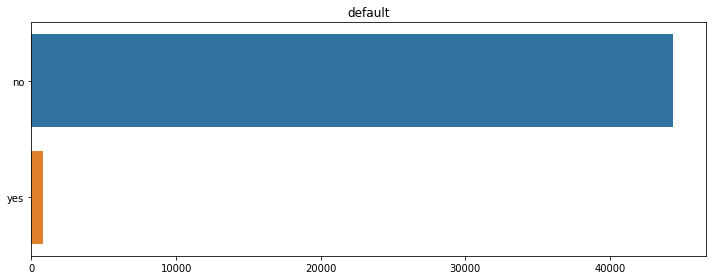

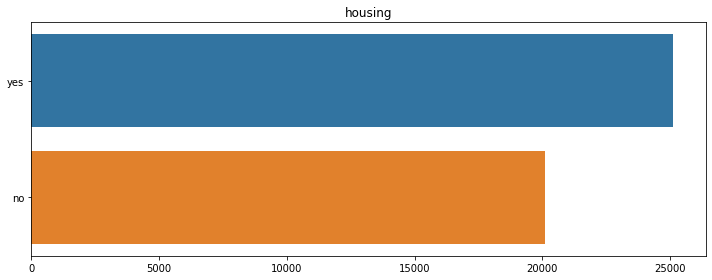

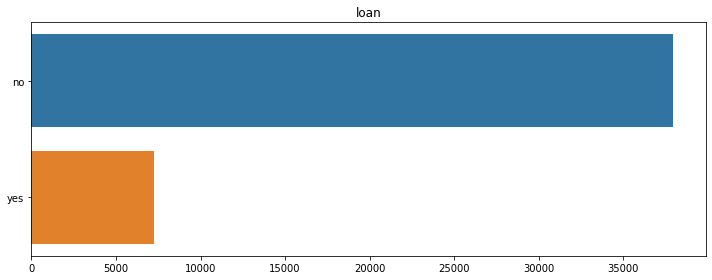

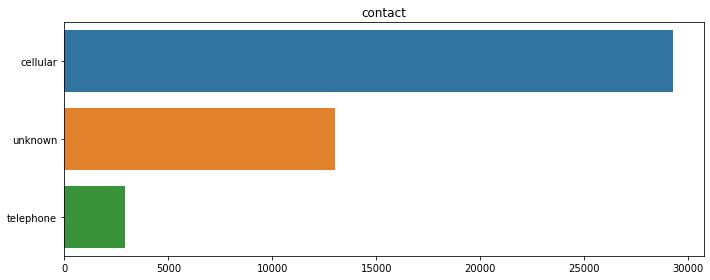

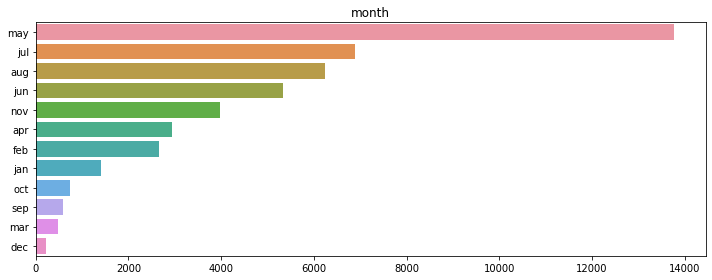

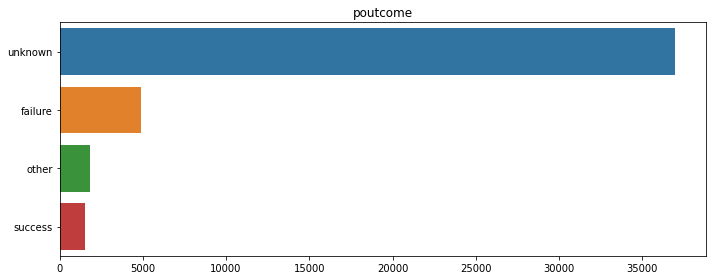

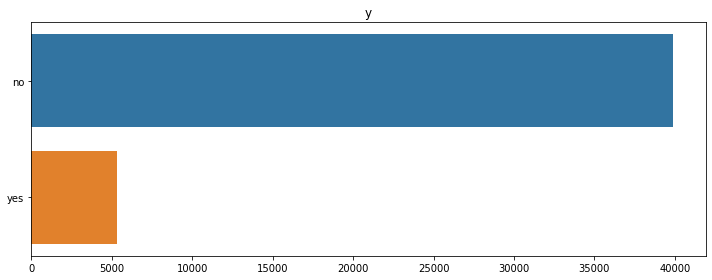

In [8]:
for col in category_cols:
    mlp.figure(figsize=(10,4))
    sns.barplot(bank[col].value_counts().values, bank[col].value_counts().index)
    mlp.title(col)
    mlp.tight_layout()

C:\Users\deepajay\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\deepajay\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\deepajay\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

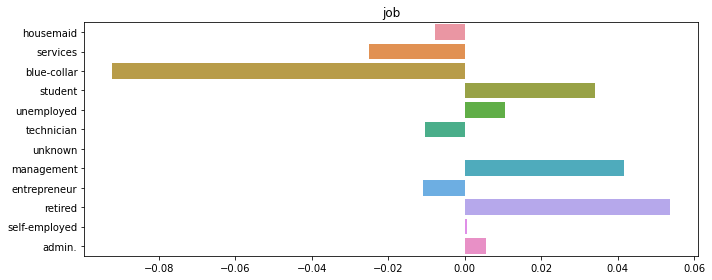

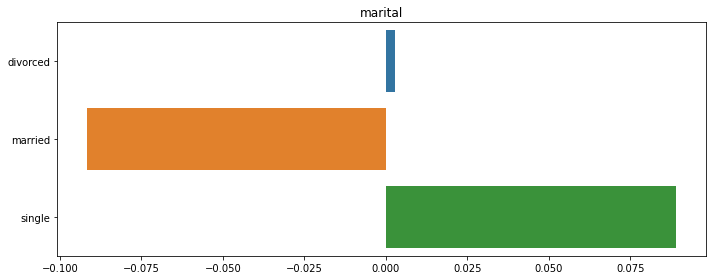

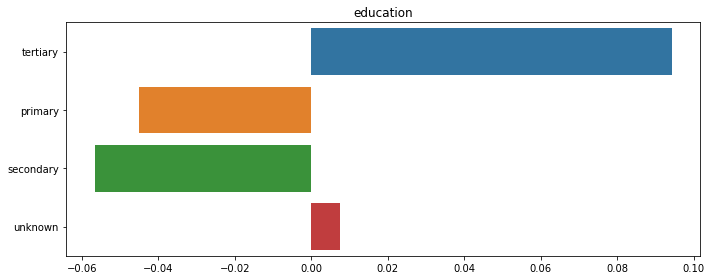

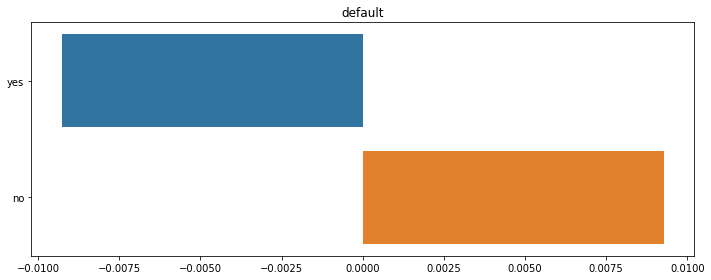

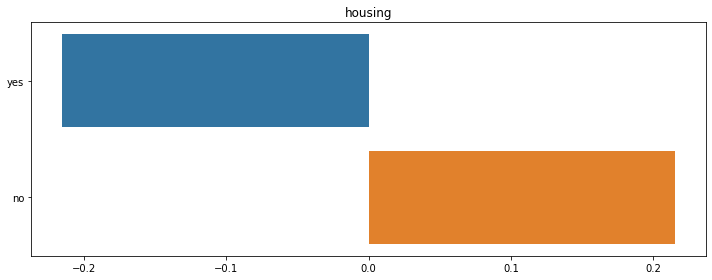

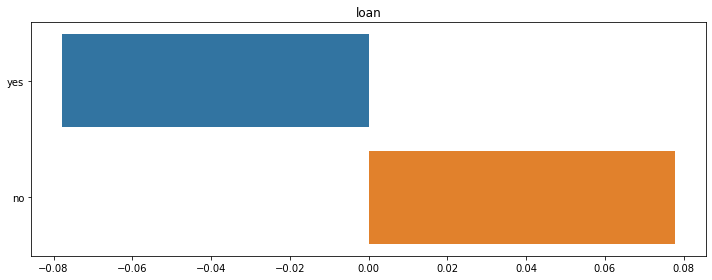

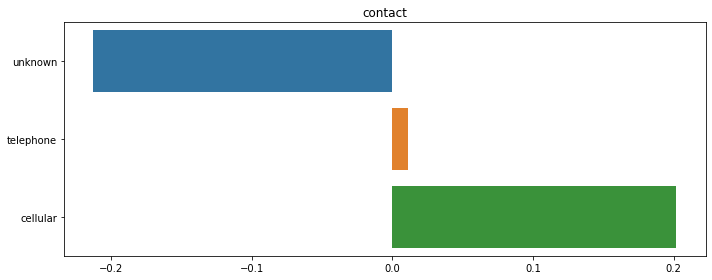

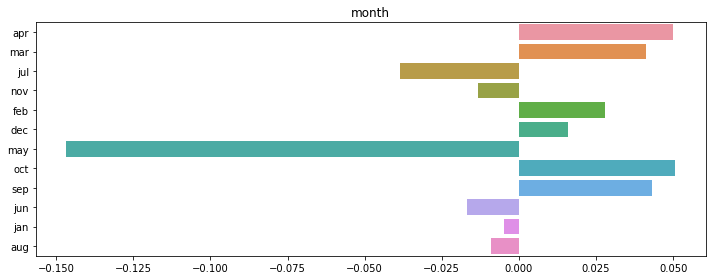

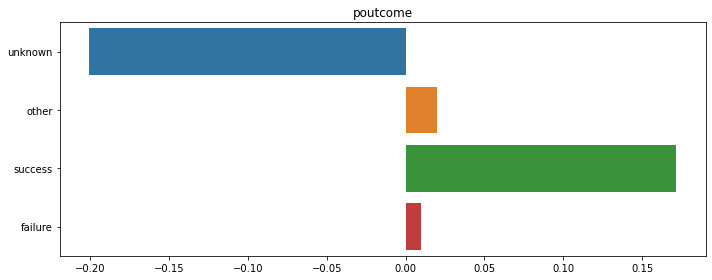

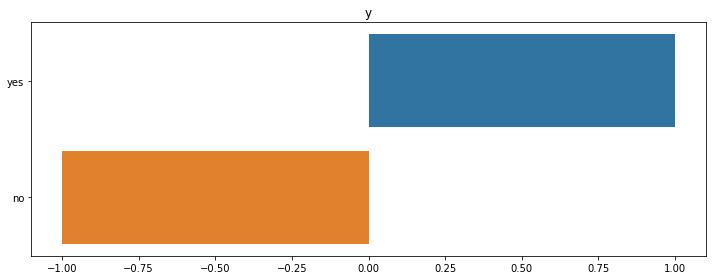

In [9]:
for col in category_cols:
    mlp.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = bank.loc[bank.y.values == 'yes', col].value_counts() 
    neg_counts = bank.loc[bank.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (bank.y.values == 'yes').sum()
    freq_neg = (bank.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    mlp.title(col)
    mlp.tight_layout()

AxesSubplot(0.125,0.1925;0.62x0.62)


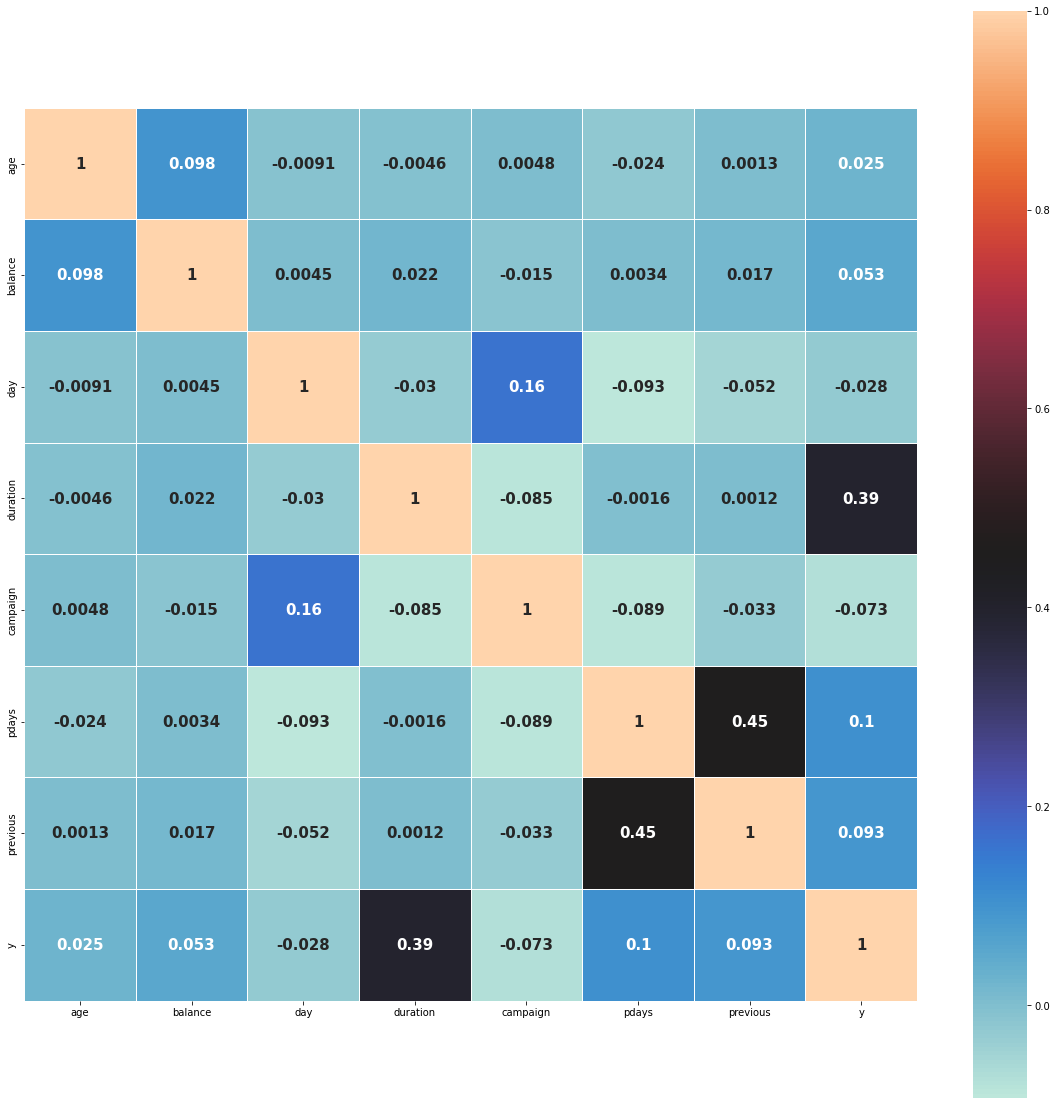

In [10]:

bank.housing.replace('unknown',bank.housing.mode()[0],inplace=True)
bank['loan'] = bank.default.replace('unknown',bank.loan.mode()[0])


bank.loc[(bank['age']>60) & (bank['job']=='unknown'), 'job'] = 'retired'
bank.loc[(bank['education']=='unknown') & (bank['job']=='management'), 'education'] = 'university.degree'
bank.loc[(bank['education']=='unknown') & (bank['job']=='services'), 'education'] = 'high.school'
bank.loc[(bank['education']=='unknown') & (bank['job']=='housemaid'), 'education'] = 'basic.4y'
bank.loc[(bank['job'] == 'unknown') & (bank['education']=='basic.4y'), 'job'] = 'blue-collar'
bank.loc[(bank['job'] == 'unknown') & (bank['education']=='basic.6y'), 'job'] = 'blue-collar'
bank.loc[(bank['job'] == 'unknown') & (bank['education']=='basic.9y'), 'job'] = 'blue-collar'
bank.loc[(bank['job']=='unknown') & (bank['education']=='professional.course'), 'job'] = 'technician'
bank['pdays'] = np.where(bank['pdays'] == 999,bank[bank['pdays'] < 999]['pdays'].mean(),bank['pdays'])
bank['y'].replace({'no':0,'yes':1},inplace=True)
fig, ax = mlp.subplots(figsize=(20,20))
a=sns.heatmap(bank.corr(), annot=True,cmap='icefire',linewidths=0.5,ax=ax, annot_kws={ 'fontsize':15, 'fontweight':'bold'}, square=True)
print(a)

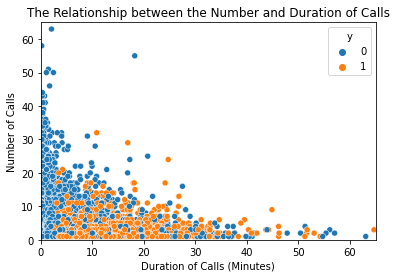

In [11]:
#using Scatter
bank['duration'] = bank['duration'].apply(lambda n:n/60).round(2)
duration_campaign = sns.scatterplot(x='duration', y='campaign',data = bank,hue = 'y')
mlp.axis([0,65,0,65])
mlp.ylabel('Number of Calls')
mlp.xlabel('Duration of Calls (Minutes)')
mlp.title('The Relationship between the Number and Duration of Calls')
mlp.show()

Train And Testing

In [12]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    mlp.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    mlp.plot([0, 1], [0, 1], linestyle='--')
    mlp.legend(loc=4)
    mlp.show()
    pass
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV


labelenc = LabelEncoder()
bank[category_cols] = bank[category_cols].apply(LabelEncoder().fit_transform)
X = bank.drop(['y','duration'],1)
y =bank['y']
X_train_im, X_test_im, y_train_im, y_test_im= train_test_split(X,y, test_size=0.3, random_state=0)

C:\Users\deepajay\AppData\Local\Temp\ipykernel_5724\3578756923.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = bank.drop(['y','duration'],1)


LogisticRegression

In [14]:
lg_clf=LogisticRegression()
#Fitting on data
lg_clf.fit(X_train_im, y_train_im)

#Scoring the model on train data
score_lg_train=lg_clf.score(X_train_im, y_train_im)
print("Training score: %.2f " % score_lg_train)

#Scoring the model on test_data
score_lg_test=lg_clf.score(X_test_im, y_test_im)
print("Testing score: %.2f " % score_lg_test)

y_pred_lg = lg_clf.predict(X_test_im)
# y_prob = rf_clf.predict_proba(X_test)
# probs = y_prob[:,1]

Training score: 0.88 
Testing score: 0.88 


C:\Users\deepajay\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


BY generating model report and classification_report

In [15]:
generate_model_report(y_test_im,y_pred_lg)
print("------"*10)
from sklearn.metrics import classification_report
b=classification_report(y_test_im,y_pred_lg)
print(b)
print("------"*10)



Accuracy =  0.8821881450899439
Precision =  0.0
Recall =  0.0
F1 Score =  0.0
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11969
           1       0.00      0.00      0.00      1595

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564

------------------------------------------------------------


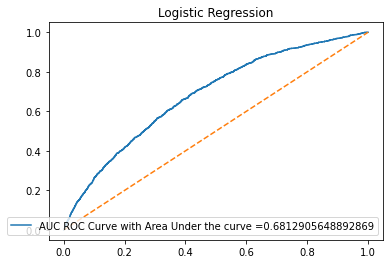

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = lg_clf.predict_proba(X_test_im)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_im,  y_pred_proba)
auc = roc_auc_score(y_test_im, y_pred_proba)
mlp.title('Logistic Regression')
mlp.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
mlp.plot([0, 1], [0, 1], linestyle='--')
mlp.legend(loc=4)
mlp.show()

In [17]:
#Parameter grid
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
parameter_grid = {'max_depth': np.arange(3,10), 'min_samples_leaf': range(10,50,10)}

model_2 = RandomForestClassifier(n_estimators=30, random_state = 33)

p_tree = GridSearchCV(estimator=model_2,param_grid=parameter_grid,cv=5)
X_train_im, X_test_im, y_train_im, y_test_im= train_test_split(X,y, test_size=0.3, random_state=0)
p_tree.fit(X_train_im,y_train_im)

acc_2 = p_tree.score(X_test_im,y_test_im)

y_pred_hyp = p_tree.predict(X_test_im)
print('Accuracy of Grid Seacrch cv = ',acc_2)
print("-------"*10)
print(generate_model_report(y_test_im,y_pred_hyp))
print("-------"*10)
print(classification_report(y_test_im, y_pred_hyp))
print("-------"*10)
# Code ends here

Accuracy of Grid Seacrch cv =  0.8927307578885284
----------------------------------------------------------------------
Accuracy =  0.8927307578885284
Precision =  0.6881720430107527
Recall =  0.16050156739811913
F1 Score =  0.2602948652770717
None
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11969
           1       0.69      0.16      0.26      1595

    accuracy                           0.89     13564
   macro avg       0.79      0.58      0.60     13564
weighted avg       0.87      0.89      0.86     13564

----------------------------------------------------------------------


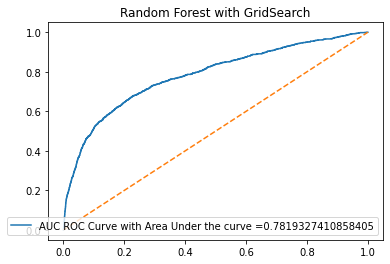

In [18]:
y_pred_proba = p_tree.predict_proba(X_test_im)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_im,  y_pred_proba)
auc = roc_auc_score(y_test_im, y_pred_proba)
mlp.title('Random Forest with GridSearch')
mlp.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
mlp.plot([0, 1], [0, 1], linestyle='--')
mlp.legend(loc=4)
mlp.show()